In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 

from IPython.display import Image

## CHALLENGE 1

In [3]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs, axis = 0)
        
week_nums = [180602, 180609, 180616, 180623, 180630]
df = get_data(week_nums)

In [4]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,00:00:00,REGULAR,6633898,2248498
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,04:00:00,REGULAR,6633916,2248500
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,08:00:00,REGULAR,6633928,2248517
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,12:00:00,REGULAR,6634015,2248577
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,16:00:00,REGULAR,6634173,2248610


In [5]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [6]:
df = df.rename(columns = {'EXITS                                                               ': 'EXITS'})

In [7]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,00:00:00,REGULAR,6633898,2248498
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,04:00:00,REGULAR,6633916,2248500
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,08:00:00,REGULAR,6633928,2248517
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,12:00:00,REGULAR,6634015,2248577
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,16:00:00,REGULAR,6634173,2248610


In [9]:
#1.) The below is the sort by the KEYS/LABELS which in this case are dates. Ex: 05/26 is < 05/27 
#so that occured first along with it's own value_counts 
# of times so thats why it occured first.

df['DATE'].value_counts().sort_index()

#2.) The below is the sort by the actual VALUES of the occurences of the dates. Ex: 06/03 occured the fewest num 
# of times so thats why it occured first. 

# new_df = df.sort_values(by='DATE')
# new_df['DATE'].value_counts(ascending=True)

05/26/2018    28075
05/27/2018    28135
05/28/2018    28090
05/29/2018    28112
05/30/2018    28014
05/31/2018    28108
06/01/2018    28102
06/02/2018    28091
06/03/2018    27974
06/04/2018    28088
06/05/2018    28109
06/06/2018    28252
06/07/2018    28056
06/08/2018    28173
06/09/2018    28054
06/10/2018    28095
06/11/2018    28068
06/12/2018    28072
06/13/2018    28058
06/14/2018    28061
06/15/2018    28570
06/16/2018    28037
06/17/2018    28220
06/18/2018    28025
06/19/2018    28127
06/20/2018    28092
06/21/2018    28099
06/22/2018    28086
06/23/2018    28096
06/24/2018    28088
06/25/2018    28175
06/26/2018    28195
06/27/2018    28105
06/28/2018    28032
06/29/2018    27999
Name: DATE, dtype: int64

## CHALLENGE 2

In [10]:
#for i in df.size()
df['DATE_TIME'] = pd.to_datetime(df['DATE'] + " " + df['TIME'], format="%m/%d/%Y %H:%M:%S")
    


#df.insert(11, "Date&Time", pd.to_datetime([df['DATE'] + df['TIME']]))

In [11]:
df.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,00:00:00,REGULAR,6633898,2248498,2018-05-26 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,04:00:00,REGULAR,6633916,2248500,2018-05-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,08:00:00,REGULAR,6633928,2248517,2018-05-26 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,12:00:00,REGULAR,6634015,2248577,2018-05-26 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,16:00:00,REGULAR,6634173,2248610,2018-05-26 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,20:00:00,REGULAR,6634367,2248645,2018-05-26 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2018,00:00:00,REGULAR,6634496,2248662,2018-05-27 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2018,04:00:00,REGULAR,6634503,2248664,2018-05-27 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2018,08:00:00,REGULAR,6634514,2248675,2018-05-27 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2018,12:00:00,REGULAR,6634542,2248713,2018-05-27 12:00:00


In [12]:
mask = ((df['C/A'] == 'A002') &
        (df['UNIT'] == 'R051')&
         (df['SCP'] == '02-00-00')&
         (df['STATION'] == '59 ST'))


df[mask].head()



,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,00:00:00,REGULAR,6633898,2248498,2018-05-26 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,04:00:00,REGULAR,6633916,2248500,2018-05-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,08:00:00,REGULAR,6633928,2248517,2018-05-26 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,12:00:00,REGULAR,6634015,2248577,2018-05-26 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2018,16:00:00,REGULAR,6634173,2248610,2018-05-26 16:00:00


In [13]:
df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME'])['ENTRIES'].count().reset_index().sort_values("ENTRIES", ascending=False).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
881688,R511,R091,00-00-00,36 AV,2018-06-21 16:00:00,2
0,A002,R051,02-00-00,59 ST,2018-05-26 00:00:00,1
655810,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-05 04:00:00,1
655812,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-05 12:00:00,1
655813,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-05 16:00:00,1


In [14]:
#df.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['DATE'].count().reset_index().head(100)

In [15]:
mask = ((df['C/A'] == 'R511') &
        (df['UNIT'] == 'R091') &
        (df['SCP'] == '00-00-00') &
        (df['STATION'] == '36 AV'))

df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
176299,R511,R091,00-00-00,36 AV,NQW,BMT,06/20/2018,16:00:00,RECOVR AUD,5055163,14849734,2018-06-20 16:00:00
176300,R511,R091,00-00-00,36 AV,NQW,BMT,06/20/2018,20:00:00,RECOVR AUD,5055163,14849751,2018-06-20 20:00:00
176301,R511,R091,00-00-00,36 AV,NQW,BMT,06/21/2018,00:00:00,RECOVR AUD,5055163,14849752,2018-06-21 00:00:00
176302,R511,R091,00-00-00,36 AV,NQW,BMT,06/21/2018,04:00:00,RECOVR AUD,5055163,14849752,2018-06-21 04:00:00
176303,R511,R091,00-00-00,36 AV,NQW,BMT,06/21/2018,08:00:00,RECOVR AUD,5055163,14849754,2018-06-21 08:00:00


In [16]:
# (df
#  .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
#  .ENTRIES.count()
#  .sort_values("ENTRIES", ascending=False)
# )

df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values(by="ENTRIES", ascending=False)


,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
881688,R511,R091,00-00-00,36 AV,2018-06-21 16:00:00,2
0,A002,R051,02-00-00,59 ST,2018-05-26 00:00:00,1
655810,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-05 04:00:00,1
655812,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-05 12:00:00,1
655813,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-05 16:00:00,1
655814,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-05 20:00:00,1
655815,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-06 00:00:00,1
655816,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-06 04:00:00,1
655817,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-06 08:00:00,1
655818,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-06 12:00:00,1


In [17]:
#new_df.head(10)

In [18]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)

In [19]:
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [20]:
df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])["ENTRIES"].count().reset_index().sort_values(by="ENTRIES", ascending=False)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-05-26 00:00:00,1
656141,R143,R032,02-03-03,TIMES SQ-42 ST,2018-06-25 08:00:00,1
655813,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-05 16:00:00,1
655814,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-05 20:00:00,1
655815,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-06 00:00:00,1
655816,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-06 04:00:00,1
655817,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-06 08:00:00,1
655818,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-06 12:00:00,1
655819,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-06 16:00:00,1
655820,R143,R032,02-03-02,TIMES SQ-42 ST,2018-06-06 20:00:00,1


In [21]:
df_daily = df.groupby(["C/A", "UNIT", "SCP", "STATION","DATE"], as_index=False)["ENTRIES"].first()


In [22]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,05/26/2018,6634367
1,A002,R051,02-00-00,59 ST,05/27/2018,6634856
2,A002,R051,02-00-00,59 ST,05/28/2018,6635407
3,A002,R051,02-00-00,59 ST,05/29/2018,6636665
4,A002,R051,02-00-00,59 ST,05/30/2018,6638063


## CHALLENGE 3

In [23]:
df_daily[["PREV_DATE", "PREV_ENTRIES"]] = df_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].transform(lambda t: t.shift(1))

In [24]:
df_daily.head(50)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,05/26/2018,6634367,NaN,NaN
1,A002,R051,02-00-00,59 ST,05/27/2018,6634856,05/26/2018,6634367.0
2,A002,R051,02-00-00,59 ST,05/28/2018,6635407,05/27/2018,6634856.0
3,A002,R051,02-00-00,59 ST,05/29/2018,6636665,05/28/2018,6635407.0
4,A002,R051,02-00-00,59 ST,05/30/2018,6638063,05/29/2018,6636665.0
5,A002,R051,02-00-00,59 ST,05/31/2018,6639572,05/30/2018,6638063.0
6,A002,R051,02-00-00,59 ST,06/01/2018,6641092,05/31/2018,6639572.0
7,A002,R051,02-00-00,59 ST,06/02/2018,6641810,06/01/2018,6641092.0
8,A002,R051,02-00-00,59 ST,06/03/2018,6642390,06/02/2018,6641810.0
9,A002,R051,02-00-00,59 ST,06/04/2018,6643774,06/03/2018,6642390.0


In [25]:
df_daily.dropna(subset=["PREV_DATE", "PREV_ENTRIES"], axis=0, inplace=True)

In [26]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,05/27/2018,6634856,05/26/2018,6634367.0
2,A002,R051,02-00-00,59 ST,05/28/2018,6635407,05/27/2018,6634856.0
3,A002,R051,02-00-00,59 ST,05/29/2018,6636665,05/28/2018,6635407.0
4,A002,R051,02-00-00,59 ST,05/30/2018,6638063,05/29/2018,6636665.0
5,A002,R051,02-00-00,59 ST,05/31/2018,6639572,05/30/2018,6638063.0


In [27]:
df_daily[df_daily["PREV_ENTRIES"] > df_daily["ENTRIES"]].groupby(["C/A", "UNIT", "SCP", "STATION"]).size()

C/A    UNIT  SCP       STATION        
A011   R080  01-00-00  57 ST-7 AV         34
A025   R023  01-03-01  34 ST-HERALD SQ    34
             01-03-02  34 ST-HERALD SQ    34
A033   R170  02-06-00  14 ST-UNION SQ      1
A049   R088  02-05-00  CORTLANDT ST       28
A066   R118  00-00-00  CANAL ST           34
B032   R264  00-00-00  OCEAN PKWY          1
C008   R099  00-03-04  DEKALB AV           2
C021   R212  00-00-02  59 ST              34
D011   R394  01-06-00  BAY PKWY           33
             01-06-01  BAY PKWY           32
H003   R163  01-00-02  6 AV               34
H023   R236  00-06-00  DEKALB AV          34
J034   R007  00-00-02  104 ST             34
JFK03  R536  00-00-02  JFK JAMAICA CT1     1
             00-00-04  JFK JAMAICA CT1     1
             00-00-05  JFK JAMAICA CT1     2
K026   R100  00-00-01  METROPOLITAN AV    34
N006A  R280  00-00-00  190 ST             19
N013   R035  02-00-01  168 ST              1
N063A  R011  00-00-04  42 ST-PORT AUTH    34
             00-

In [28]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = df_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

524514 1535945.0
851 5073692.0
1442830408 11142329.0
596 4709092.0
762 11178158.0
213 1320240.0
33604923 145084.0
33602425 158379.0
218572258 118342317.0
1493118168 10962985.0
704645242 2782942.0
486 5890270.0
117444532 136656341.0
1971 8259953.0
2452 4417046.0
1153 4951139.0
347 1133456.0
4949 2007890462.0
1577074115 6175973.0
116 3449388.0
1258306609 4961695.0
1962868327 9144704.0
1067608 268483050.0
989908557 3890474.0
51136977 201563674.0
145 51138084.0
694 5970078.0
17452331 5055163.0
6 1743040.0
342 3420200.0
686 3654889.0


In [29]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
df_daily["DAILY_ENTRIES"] = df_daily.apply(get_daily_counts, axis=1, max_counter=100000)

524514 1535945.0
655386 524839.0
369 169654.0
851 5073692.0
524288 585.0
902 641785.0
298 319510.0
1442830408 11142329.0
596 4709092.0
995 165800.0
762 11178158.0
213 1320240.0
33604923 145084.0
33602425 158379.0
218572258 118342317.0
1493118168 10962985.0
704645242 2782942.0
273 557803.0
486 5890270.0
458942 240969.0
458757 723649.0
117444532 136656341.0
88 133054.0
213 553688.0
323 175528.0
326 196931.0
0 438979.0
440407 0.0
76 192566.0
2171 625554.0
127 191525.0
619 259860.0
220 890540.0
225 197880.0
43 262624.0
82 595100.0
94 316019.0
1888 234567.0
2431 109544.0
23 669244.0
1971 8259953.0
2452 4417046.0
41 682135.0
1153 4951139.0
347 1133456.0
4949 2007890462.0
1577074115 6175973.0
116 3449388.0
1258306609 4961695.0
1962868327 9144704.0
1067608 268483050.0
786432 0.0
989908557 3890474.0
51136977 201563674.0
145 51138084.0
694 5970078.0
17452331 5055163.0
6 1743040.0
342 3420200.0
686 3654889.0


In [30]:
df_daily.head(100)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/27/2018,6634856,05/26/2018,6634367.0,489.0
2,A002,R051,02-00-00,59 ST,05/28/2018,6635407,05/27/2018,6634856.0,551.0
3,A002,R051,02-00-00,59 ST,05/29/2018,6636665,05/28/2018,6635407.0,1258.0
4,A002,R051,02-00-00,59 ST,05/30/2018,6638063,05/29/2018,6636665.0,1398.0
5,A002,R051,02-00-00,59 ST,05/31/2018,6639572,05/30/2018,6638063.0,1509.0
6,A002,R051,02-00-00,59 ST,06/01/2018,6641092,05/31/2018,6639572.0,1520.0
7,A002,R051,02-00-00,59 ST,06/02/2018,6641810,06/01/2018,6641092.0,718.0
8,A002,R051,02-00-00,59 ST,06/03/2018,6642390,06/02/2018,6641810.0,580.0
9,A002,R051,02-00-00,59 ST,06/04/2018,6643774,06/03/2018,6642390.0,1384.0
10,A002,R051,02-00-00,59 ST,06/05/2018,6645266,06/04/2018,6643774.0,1492.0


## CHALLENGE 4

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5,1,'Daily total ridership')

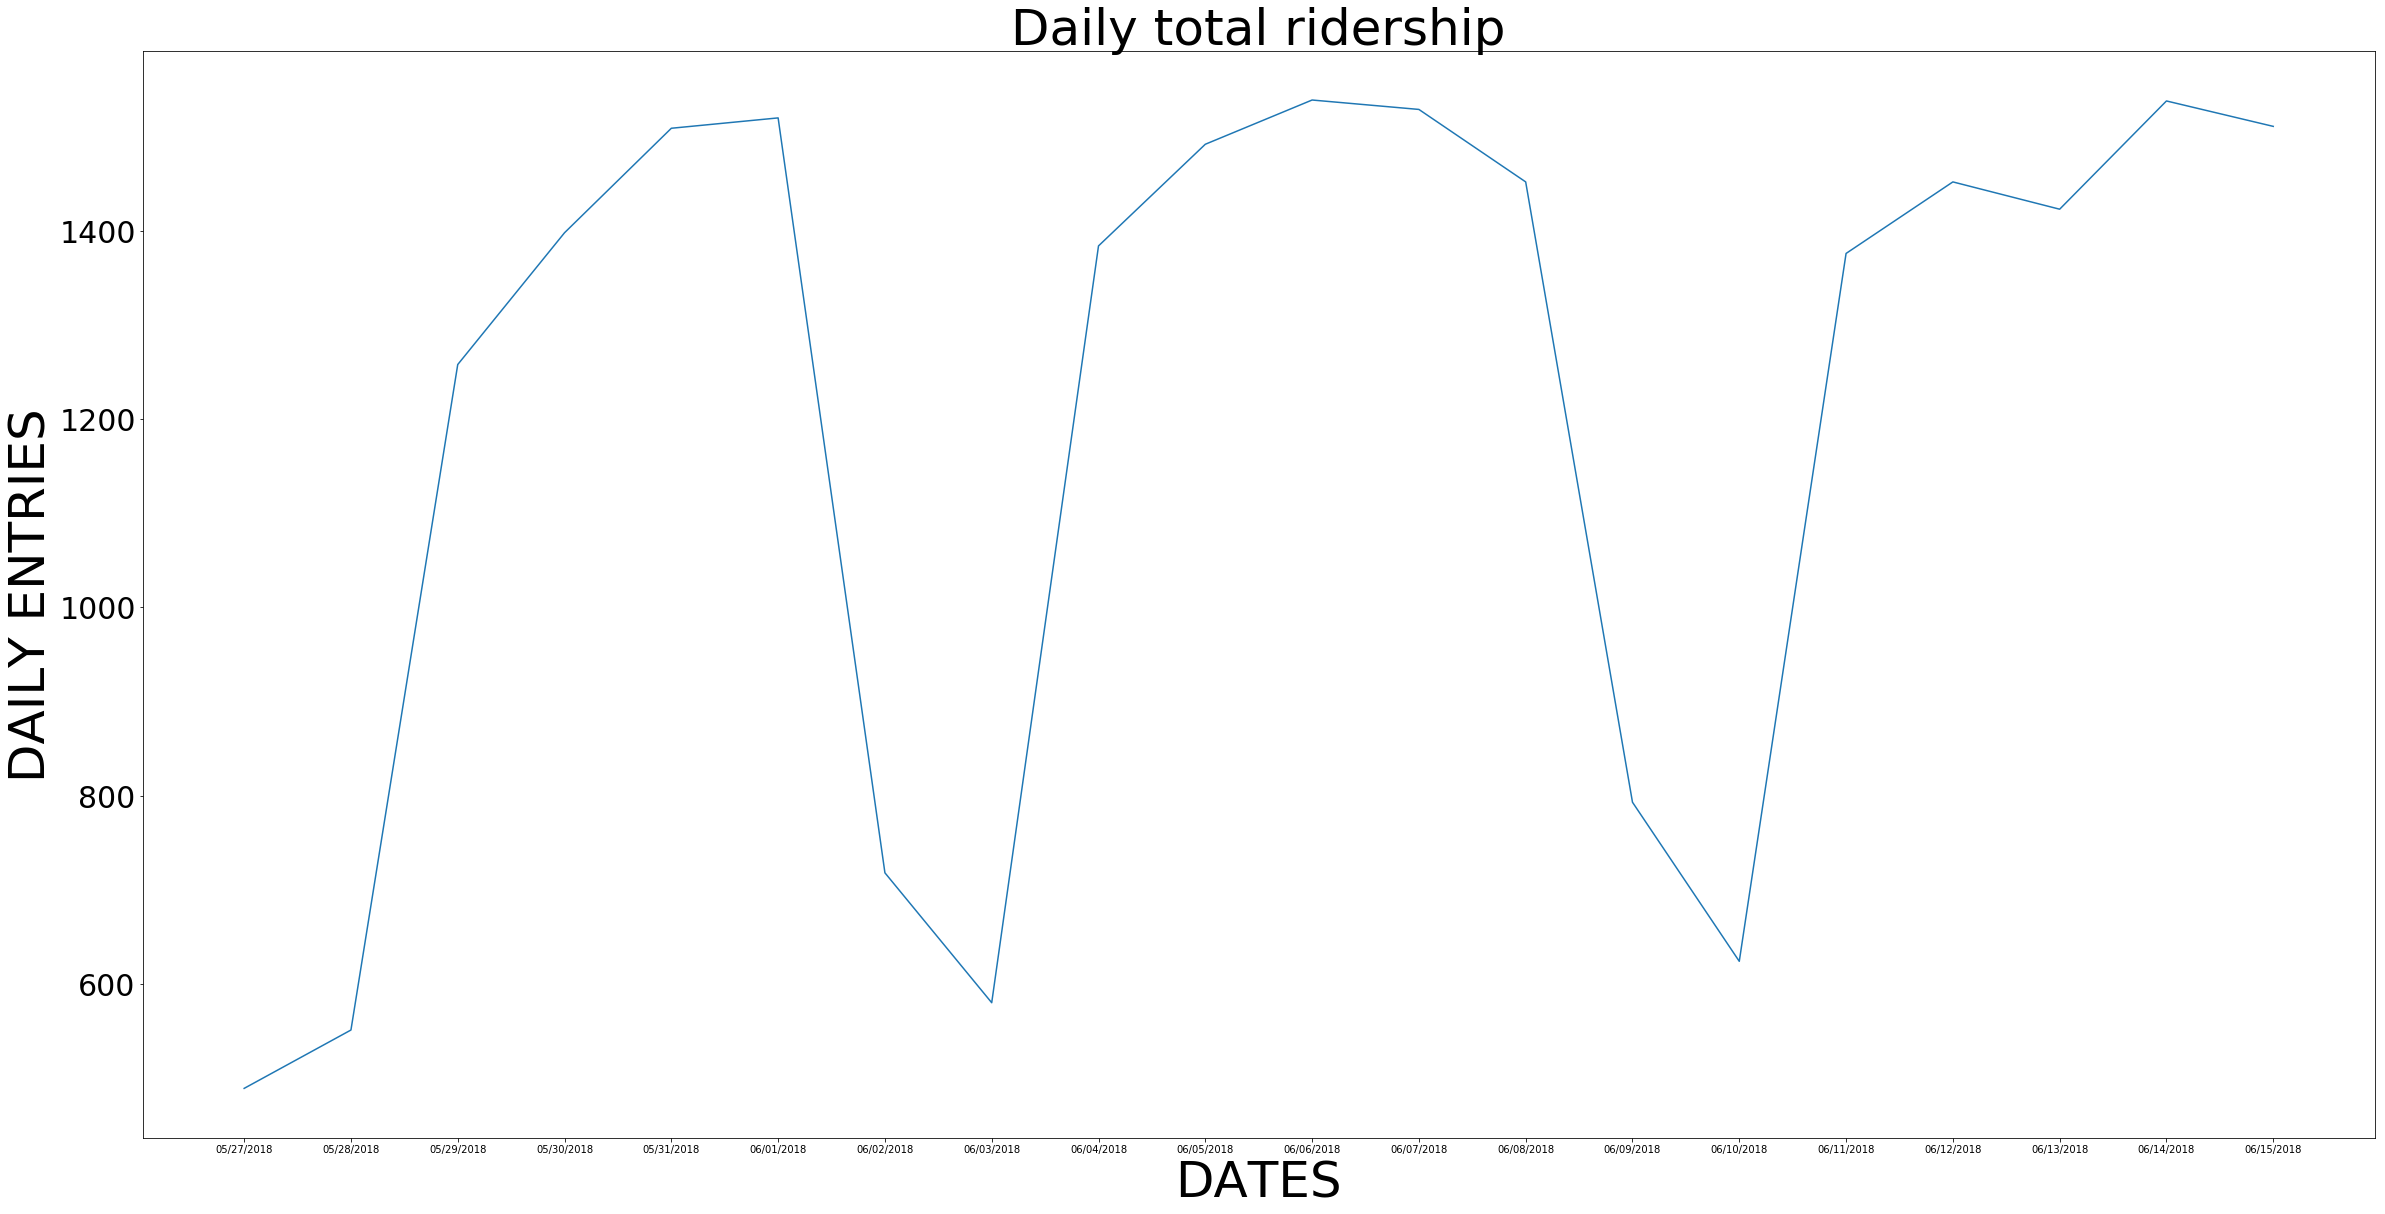

In [32]:
#Took a few random times from first av station 
plt.figure(figsize = (40, 20))
graphical_plot = df_daily.head(20)
graphical_plot
plt.plot(graphical_plot["DATE"], graphical_plot["DAILY_ENTRIES"])
plt.xlabel('DATES', fontsize = 50)
plt.ylabel('DAILY ENTRIES', fontsize=50)
plt.yticks(fontsize=30)
plt.title('Daily total ridership', fontsize="50")

In [33]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159636 entries, 1 to 164361
Data columns (total 9 columns):
C/A              159636 non-null object
UNIT             159636 non-null object
SCP              159636 non-null object
STATION          159636 non-null object
DATE             159636 non-null object
ENTRIES          159636 non-null int64
PREV_DATE        159636 non-null object
PREV_ENTRIES     159636 non-null float64
DAILY_ENTRIES    159636 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 12.2+ MB


In [34]:
mask2 = ((df_daily['C/A'] == 'A002') &
        (df_daily['UNIT'] == 'R051')&
         (df_daily['STATION'] == '59 ST')&
          (df_daily['DATE'] == "05/27/2018"))

df_daily[mask2]



,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/27/2018,6634856,05/26/2018,6634367.0,489.0
36,A002,R051,02-00-01,59 ST,05/27/2018,5944799,05/26/2018,5944367.0,432.0
71,A002,R051,02-03-00,59 ST,05/27/2018,1081905,05/26/2018,1081687.0,218.0
106,A002,R051,02-03-01,59 ST,05/27/2018,707437,05/26/2018,706793.0,644.0
141,A002,R051,02-03-02,59 ST,05/27/2018,5790277,05/26/2018,5789705.0,572.0
176,A002,R051,02-03-03,59 ST,05/27/2018,5385872,05/26/2018,5385405.0,467.0
211,A002,R051,02-03-04,59 ST,05/27/2018,6721487,05/26/2018,6720927.0,560.0
246,A002,R051,02-03-05,59 ST,05/27/2018,10815795,05/26/2018,10814879.0,916.0
281,A002,R051,02-03-06,59 ST,05/27/2018,8508810,05/26/2018,8508313.0,497.0
316,A002,R051,02-05-00,59 ST,05/27/2018,1531,05/26/2018,1531.0,0.0


## CHALLENGE 5

In [35]:
df_group_turnstiles = df_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])["DAILY_ENTRIES"].sum().reset_index()
df_group_turnstiles

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,05/27/2018,5306.0
1,A002,R051,59 ST,05/28/2018,5609.0
2,A002,R051,59 ST,05/29/2018,12526.0
3,A002,R051,59 ST,05/30/2018,13760.0
4,A002,R051,59 ST,05/31/2018,13911.0
5,A002,R051,59 ST,06/01/2018,13785.0
6,A002,R051,59 ST,06/02/2018,7946.0
7,A002,R051,59 ST,06/03/2018,6273.0
8,A002,R051,59 ST,06/04/2018,12233.0
9,A002,R051,59 ST,06/05/2018,13559.0


## CHALLENGE 6

In [36]:
new_new_df = df_daily.groupby(["STATION", "DATE"])["DAILY_ENTRIES"].sum().reset_index()

In [37]:
new_new_df

,STATION,DATE,DAILY_ENTRIES
0,1 AV,05/27/2018,13287.0
1,1 AV,05/28/2018,12572.0
2,1 AV,05/29/2018,20723.0
3,1 AV,05/30/2018,22414.0
4,1 AV,05/31/2018,22932.0
5,1 AV,06/01/2018,23456.0
6,1 AV,06/02/2018,20048.0
7,1 AV,06/03/2018,16096.0
8,1 AV,06/04/2018,21458.0
9,1 AV,06/05/2018,20499.0


## CHALLENGE 7

Text(0.5,1,'Daily total ridership - 1 AV Station')

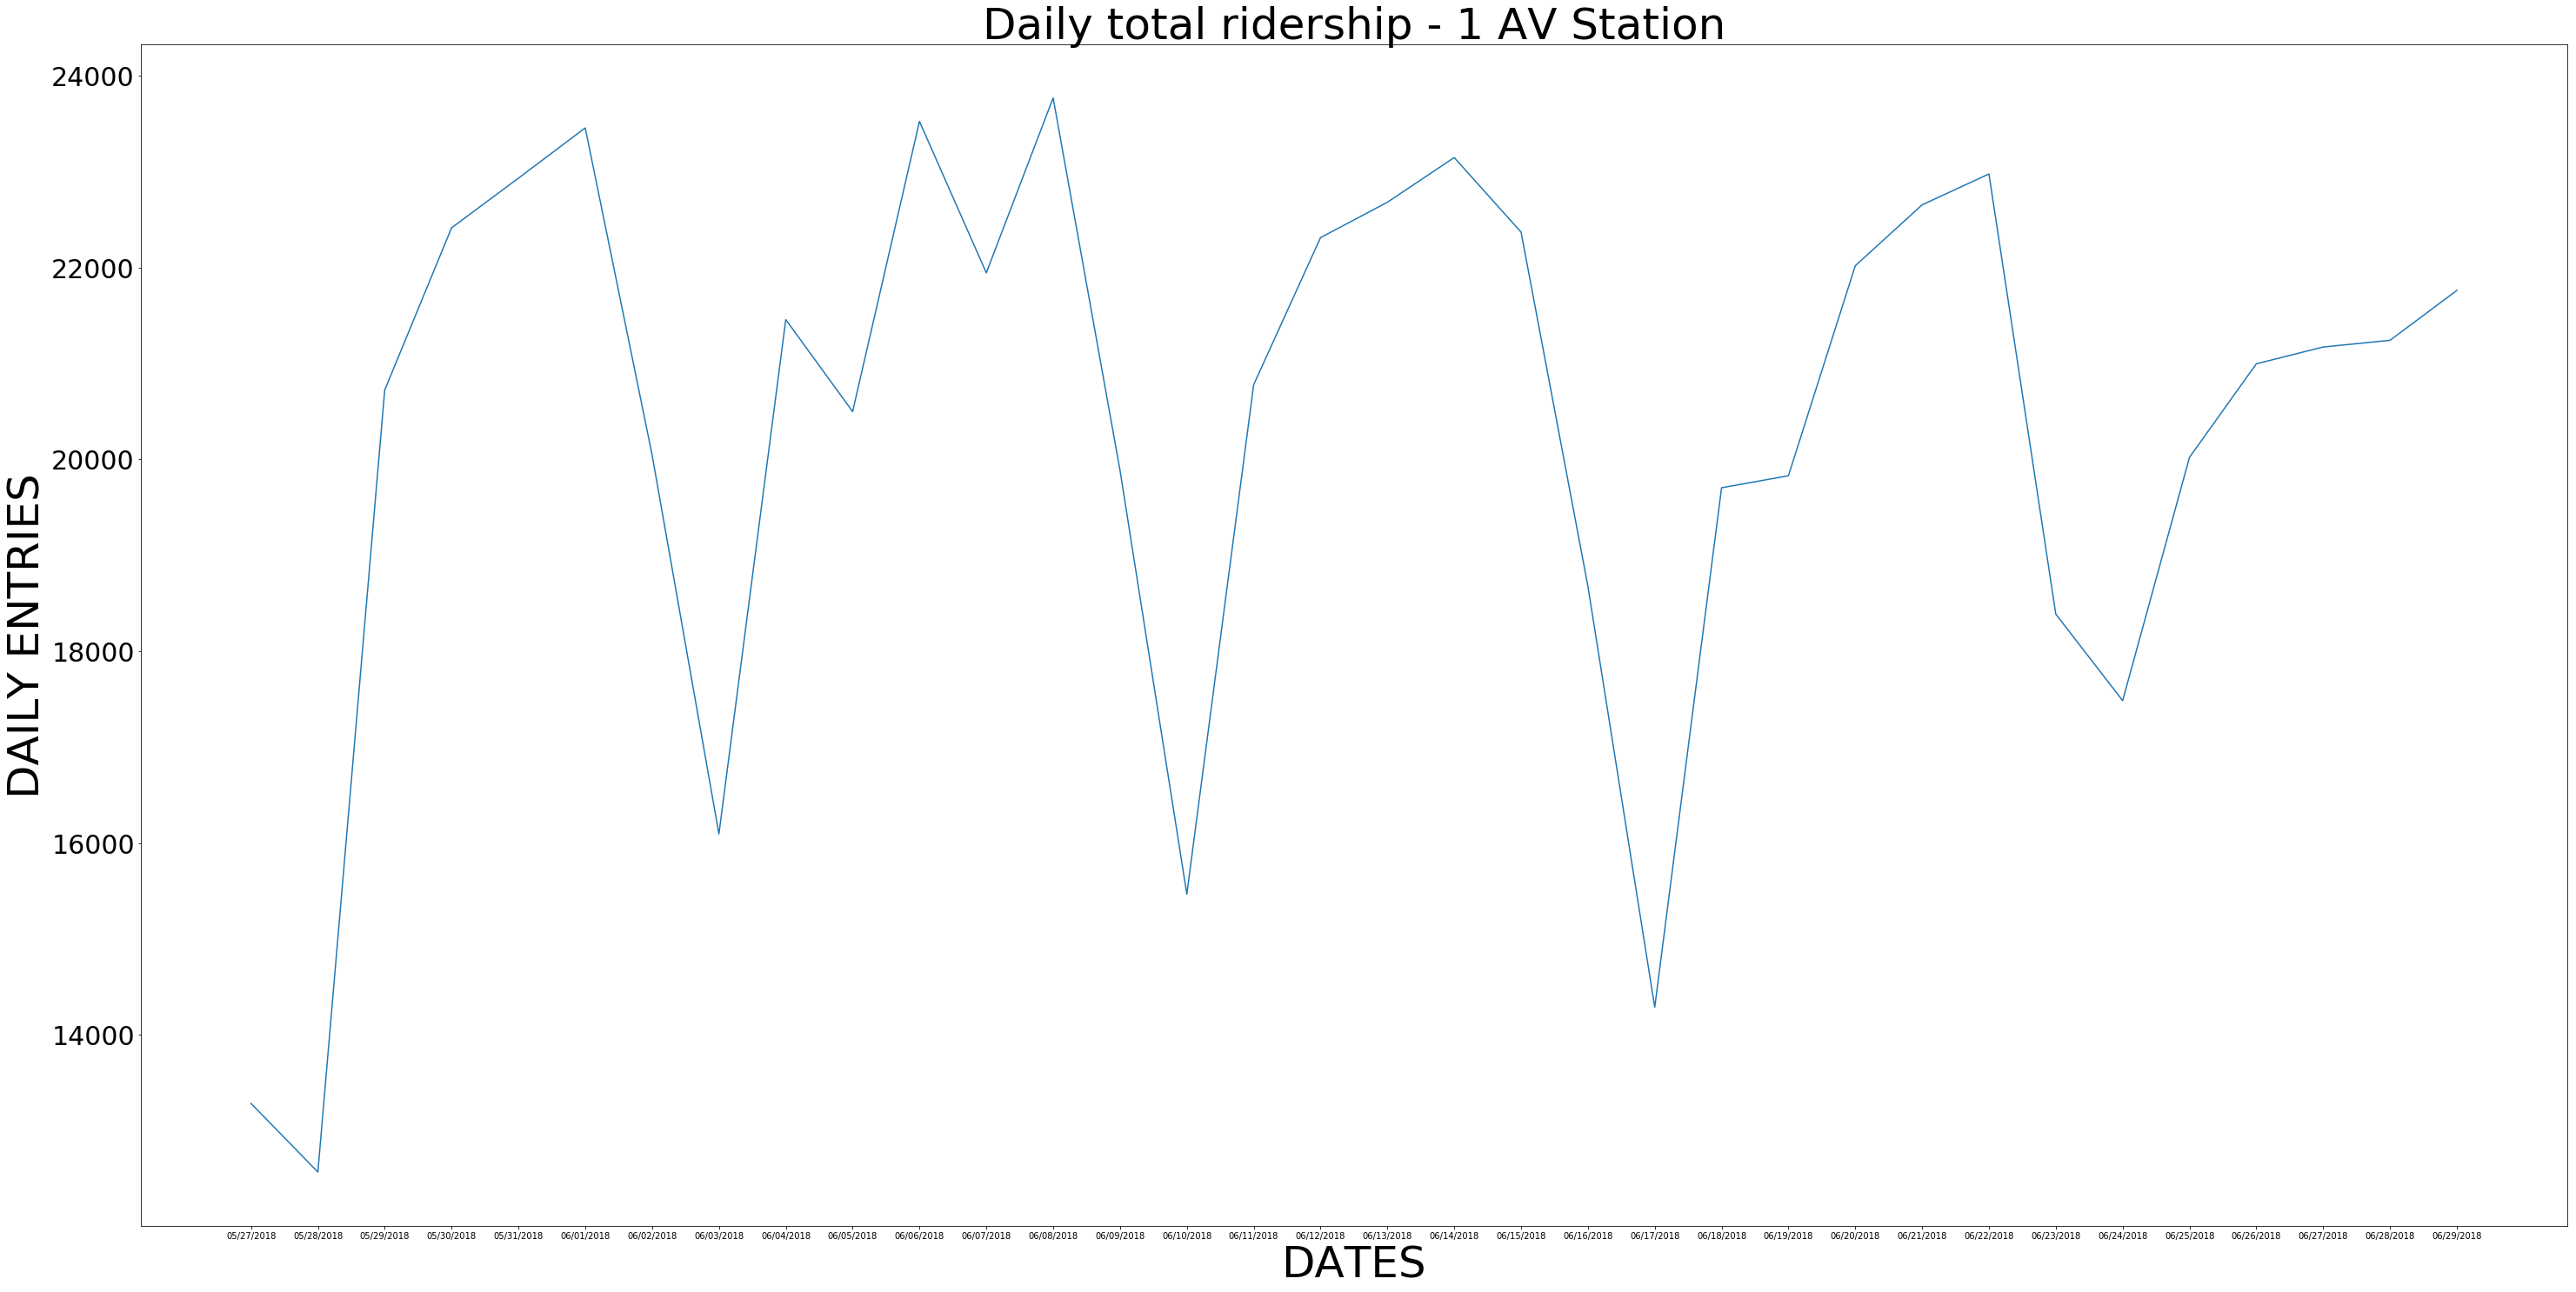

In [38]:
plt.figure(figsize=(50, 25))
first_av_x = new_new_df[(new_new_df["STATION"] == "1 AV")]["DATE"]
first_av_y = new_new_df[(new_new_df["STATION"] == "1 AV")]["DAILY_ENTRIES"]
plt.plot(first_av_x, first_av_y)
plt.xlabel('DATES', fontsize = 50)
plt.ylabel('DAILY ENTRIES', fontsize=50)
plt.yticks(fontsize=30)
plt.title('Daily total ridership - 1 AV Station', fontsize="50")

## CHALLENGE 8

In [39]:
new_new_df["WEEK_NUMBER"] = pd.to_datetime(new_new_df["DATE"]).transform(lambda t: t.week)

In [40]:
new_new_df["YEAR"] = pd.to_datetime(new_new_df["DATE"]).transform(lambda t: t.year)

In [41]:
new_new_df["DAY_NAME"] = pd.to_datetime(new_new_df["DATE"]).transform(lambda t: t.dt.weekday)

In [42]:
columnsTitles = ['STATION', 'DATE', 'YEAR', 'WEEK_NUMBER', 'DAY_NAME', 'DAILY_ENTRIES']

new_new_df.reindex(columns=columnsTitles)

,STATION,DATE,YEAR,WEEK_NUMBER,DAY_NAME,DAILY_ENTRIES
0,1 AV,05/27/2018,2018,21,6,13287.0
1,1 AV,05/28/2018,2018,22,0,12572.0
2,1 AV,05/29/2018,2018,22,1,20723.0
3,1 AV,05/30/2018,2018,22,2,22414.0
4,1 AV,05/31/2018,2018,22,3,22932.0
5,1 AV,06/01/2018,2018,22,4,23456.0
6,1 AV,06/02/2018,2018,22,5,20048.0
7,1 AV,06/03/2018,2018,22,6,16096.0
8,1 AV,06/04/2018,2018,23,0,21458.0
9,1 AV,06/05/2018,2018,23,1,20499.0


In [43]:
plot_weekly_df = new_new_df.loc[new_new_df["STATION"] == "1 AV"]
plot_weekly_df

,STATION,DATE,DAILY_ENTRIES,WEEK_NUMBER,YEAR,DAY_NAME
0,1 AV,05/27/2018,13287.0,21,2018,6
1,1 AV,05/28/2018,12572.0,22,2018,0
2,1 AV,05/29/2018,20723.0,22,2018,1
3,1 AV,05/30/2018,22414.0,22,2018,2
4,1 AV,05/31/2018,22932.0,22,2018,3
5,1 AV,06/01/2018,23456.0,22,2018,4
6,1 AV,06/02/2018,20048.0,22,2018,5
7,1 AV,06/03/2018,16096.0,22,2018,6
8,1 AV,06/04/2018,21458.0,23,2018,0
9,1 AV,06/05/2018,20499.0,23,2018,1


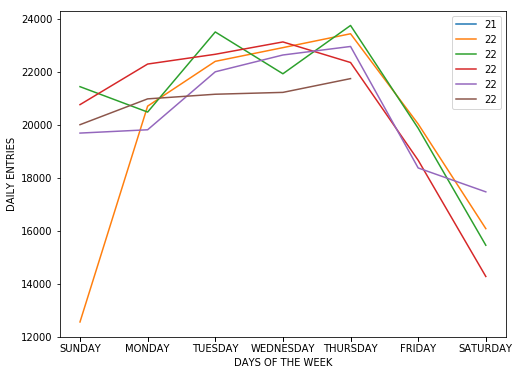

In [44]:
#plot_weekly_df.groupby(["YEAR", "WEEK_NUMBER"]).size().unstack(fill_value=0).plot()
fig, ax = plt.subplots(figsize=(8,6))
plot_weekly_df.groupby(["YEAR","WEEK_NUMBER"]).plot(kind='line', x = "DAY_NAME", y = "DAILY_ENTRIES", ax=ax)
plt.xticks(plot_weekly_df["DAY_NAME"], ['SATURDAY', 'SUNDAY','MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY'])
plt.legend(plot_weekly_df["WEEK_NUMBER"])
plt.ylabel("DAILY ENTRIES")
plt.xlabel("DAYS OF THE WEEK")
plt.show()

## CHALLENGE 9

In [45]:
multiweeks_df = new_new_df.groupby(["STATION", "YEAR"])["DAILY_ENTRIES"].sum().reset_index()

#multiweeks_df["WEEKLY_ENTRIES"] = new_new_df.groupby(["STATION", "YEAR", "WEEK_NUMBER"])["DAILY_ENTRIES"].sum().reset_index()





In [46]:
multiweeks_df.rename(columns={"DAILY_ENTRIES":"TOTAL_YEARLY_ENTRIES"}, inplace = True)

In [47]:
multiweeks_df

,STATION,YEAR,TOTAL_YEARLY_ENTRIES
0,1 AV,2018,690591.0
1,103 ST,2018,969197.0
2,103 ST-CORONA,2018,602983.0
3,104 ST,2018,118906.0
4,110 ST,2018,329803.0
5,111 ST,2018,499948.0
6,116 ST,2018,1025898.0
7,116 ST-COLUMBIA,2018,370321.0
8,121 ST,2018,37195.0
9,125 ST,2018,2434135.0


In [48]:
multiweeks_df.sort_values(by=["TOTAL_YEARLY_ENTRIES"], ascending = False)

,STATION,YEAR,TOTAL_YEARLY_ENTRIES
60,34 ST-PENN STA,2018,4926327.0
232,GRD CNTRL-42 ST,2018,4418785.0
58,34 ST-HERALD SQ,2018,3753698.0
45,23 ST,2018,3310519.0
14,14 ST-UNION SQ,2018,3223982.0
352,TIMES SQ-42 ST,2018,3192901.0
67,42 ST-PORT AUTH,2018,3114553.0
225,FULTON ST,2018,2857221.0
172,CANAL ST,2018,2451370.0
109,86 ST,2018,2441097.0


## CHALLENGE 10

(-245715.75000000006, 5172614.750000001)

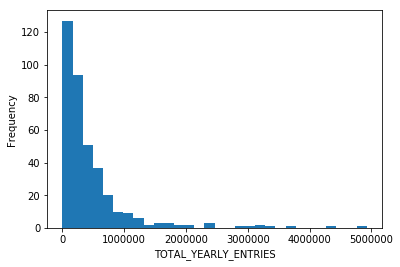

In [49]:
multiweeks_df['TOTAL_YEARLY_ENTRIES'].plot(kind='hist', bins = 30)
plt.xlabel('TOTAL_YEARLY_ENTRIES')
plt.xlim()